In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D,Activation,BatchNormalization
from keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
#Matplotlib relies on the Pillow library to load image data.

# import the opencv library
import cv2

In [2]:
dimension = 48

In [3]:
data=pd.read_csv("dataset/age_gender.csv")

In [4]:
data['pixels']=data['pixels'].apply(lambda x: np.array(x.split(), dtype="float32"))
data['pixels'] = data['pixels'].apply(lambda x: x/255)

In [5]:
def age_grouper(x):
    if x>=0 and x < 10:
        return 0
    elif x>=10 and x < 20:
        return 1
    elif x>=20 and x < 35:
        return 2
    elif x>=35 and x < 50:
        return 3
    elif x>=50 and x < 60:
        return 4
    else:
        return 5


In [6]:
data['age_group'] = data['age'].apply(age_grouper)
X = np.array(data['pixels'].tolist())

## Converting pixels from 1D to 2D
X = X.reshape(X.shape[0],dimension,dimension,1)
y = data['age_group']

X_train, X_test, y_train, y_test = train_test_split ( X, y, test_size=0.20, stratify=y)

In [2]:
model = keras.models.load_model('AgeModel/age64_acc_74_val_acc_63.h5')
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 64, 64, 64)        640       
_________________________________________________________________
activation_55 (Activation)   (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
activation_56 (Activation)   (None, 32, 32, 128)     

In [18]:
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate=0.001, decay=1e-6,momentum=0.1,nesterov=True)
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# model.summary()
history = model.fit(X_train, y_train, batch_size = 16, epochs = 10, verbose = 2, validation_data = (X_test, y_test))

Epoch 1/10
1186/1186 - 224s - loss: 0.8006 - accuracy: 0.7013 - val_loss: 0.5523 - val_accuracy: 0.8068
Epoch 2/10
1186/1186 - 205s - loss: 0.7440 - accuracy: 0.7194 - val_loss: 0.5569 - val_accuracy: 0.8165
Epoch 3/10
1186/1186 - 205s - loss: 0.7103 - accuracy: 0.7331 - val_loss: 0.5886 - val_accuracy: 0.7956
Epoch 4/10
1186/1186 - 235s - loss: 0.7042 - accuracy: 0.7382 - val_loss: 0.6288 - val_accuracy: 0.7971
Epoch 5/10
1186/1186 - 235s - loss: 0.7226 - accuracy: 0.7275 - val_loss: 0.7306 - val_accuracy: 0.7722
Epoch 6/10
1186/1186 - 235s - loss: 0.7053 - accuracy: 0.7366 - val_loss: 0.6071 - val_accuracy: 0.8159
Epoch 7/10
1186/1186 - 228s - loss: 0.7041 - accuracy: 0.7380 - val_loss: 0.5970 - val_accuracy: 0.8038
Epoch 8/10
1186/1186 - 212s - loss: 0.6955 - accuracy: 0.7402 - val_loss: 0.5413 - val_accuracy: 0.8194
Epoch 9/10
1186/1186 - 211s - loss: 0.6785 - accuracy: 0.7448 - val_loss: 5.6193 - val_accuracy: 0.6745
Epoch 10/10
1186/1186 - 213s - loss: 0.6644 - accuracy: 0.7520 -

In [19]:
model.save('AgeModel/age-48-model-1.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 64)        0

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

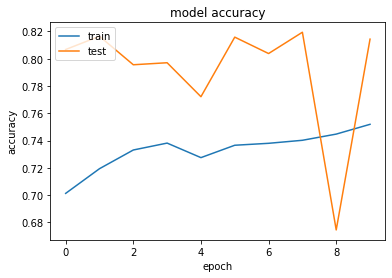

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

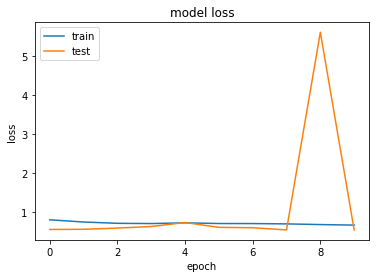

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()